In [1]:
import ROOT as R
from util import *
from analysis_branch import *
import os

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02


In [2]:
R.EnableImplicitMT()

In [3]:
path = './Pre_SlimmedSignal'
norm_path = '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/TEST_0103_UL_DeepJet'
string_list_for_ZHH   = []

In [24]:
model = R.RDF.TH1DModel('ZHH', 'genWeight', 1000, 0.9, 1.1)

In [63]:
for _file in file_list_ZHH:
    if _file == 'ZHHTo4B_CV_1_0_C2V_1_0_C3_20_0':
        continue
    print(_file)
    string_list_for_ZHH.append('{0}/{1}.root'.format(path,_file))
    rdf_dict[_file] = R.RDataFrame('Events','{0}/{1}.root'.format(path,_file))
#     histo_dict[_file] = rdf_dict[_file].Histo1D(model, 'weight')
    histo_dict[_file] = rdf_dict[_file].Histo1D('weight')

ZHHTo4B_CV_0_5_C2V_1_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_0_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_0_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_2_0
ZHHTo4B_CV_1_0_C2V_2_0_C3_1_0
ZHHTo4B_CV_1_5_C2V_1_0_C3_1_0


In [70]:
for _file in file_list_ZHH:
    print(_file)
    string_list_for_ZHH.append('{0}/{1}/*.root'.format(norm_path,_file))
    rdf_dict[_file] = R.RDataFrame('Events','{0}/{1}/*.root'.format(norm_path,_file))
#     histo_dict[_file] = rdf_dict[_file].Histo1D(model, 'genWeight')
    histo_dict[_file] = rdf_dict[_file].Filter('boostedCategory == 4').Histo1D('VHH_HH_pT','weight')

ZHHTo4B_CV_0_5_C2V_1_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_0_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_0_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_2_0
ZHHTo4B_CV_1_0_C2V_2_0_C3_1_0
ZHHTo4B_CV_1_5_C2V_1_0_C3_1_0
ZHHTo4B_CV_1_0_C2V_1_0_C3_20_0


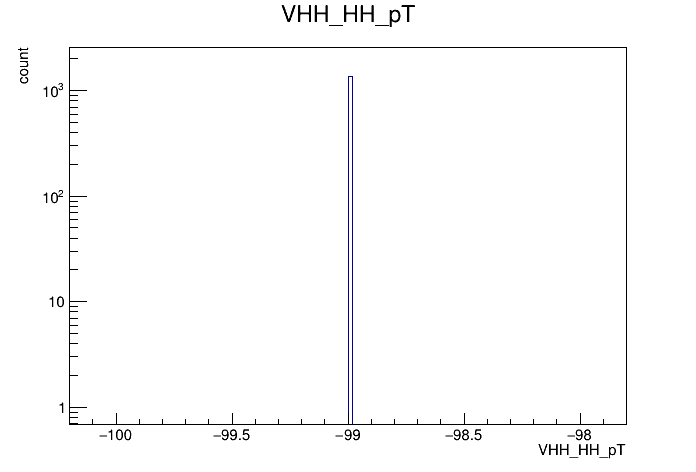

In [71]:
c = R.TCanvas()
c.SetLogy()
R.gStyle.SetOptStat(0000)
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0'].Draw()
c.Draw()